<a href="https://colab.research.google.com/github/SubalakshmiAriyaselvam/-ML-MINOR-MAY/blob/main/ML-MINOR-MAY_MINI_PROJECT_ON_IMAGE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BINARY IMAGE CLASSIFICATION** 

In [91]:
!pip install ipython-autotime --quiet
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.84 s (started: 2021-06-28 15:17:23 +00:00)


In [141]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/drive/MyDrive/images'
CATEGORIES = ['tree','book']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 896 ms (started: 2021-06-28 15:31:01 +00:00)


In [142]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

time: 7.38 ms (started: 2021-06-28 15:31:02 +00:00)


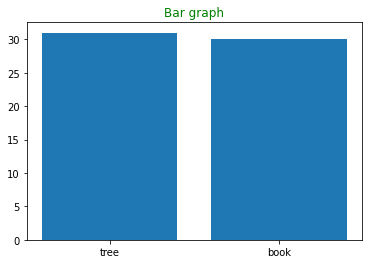

time: 160 ms (started: 2021-06-28 15:31:02 +00:00)


In [143]:
unique,count = np.unique(target,return_counts=True)
import matplotlib.pyplot as plt
plt.bar(CATEGORIES,count)
plt.title('Bar graph',color = 'g')
plt.show()

In [144]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

time: 16.1 ms (started: 2021-06-28 15:31:03 +00:00)


**NORMALISATION AND TO FIND BETTER ACCURACY :**

**METHOD 1 - SVM [Support Vector Machines]**

In [145]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 42.1 s (started: 2021-06-28 15:31:03 +00:00)


In [146]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0])

time: 82.4 ms (started: 2021-06-28 15:31:45 +00:00)


In [147]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

time: 4.23 ms (started: 2021-06-28 15:31:45 +00:00)


In [148]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.65 ms (started: 2021-06-28 15:31:45 +00:00)


In [149]:
accuracy_score(y_pred,y_test)

0.9473684210526315

time: 9.83 ms (started: 2021-06-28 15:31:45 +00:00)


In [150]:
confusion_matrix(y_pred,y_test)

array([[12,  1],
       [ 0,  6]])

time: 4.83 ms (started: 2021-06-28 15:31:45 +00:00)


**METHOD 2 - LOGISTIC REGRESSION**

In [151]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred1 = model.predict(x_test)
y_pred1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

time: 2.31 s (started: 2021-06-28 15:32:52 +00:00)


In [152]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

time: 4.75 ms (started: 2021-06-28 15:32:55 +00:00)


In [153]:
accuracy_score(y_pred1,y_test)

1.0

time: 4.28 ms (started: 2021-06-28 15:32:55 +00:00)


In [154]:
confusion_matrix(y_pred1,y_test)

array([[12,  0],
       [ 0,  7]])

time: 5.65 ms (started: 2021-06-28 15:32:55 +00:00)


**METHOD 3 - XGBOOST**

In [155]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train,y_train)
y_pred2 = model.predict(x_test)
y_pred2

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

time: 11.2 s (started: 2021-06-28 15:32:55 +00:00)


In [156]:
accuracy_score(y_pred2,y_test)

0.9473684210526315

time: 5.17 ms (started: 2021-06-28 15:33:06 +00:00)


In [157]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 40 ms (started: 2021-06-28 15:33:06 +00:00)


In [158]:
model = pickle.load(open('img_model.p','rb'))

time: 15.4 ms (started: 2021-06-28 15:33:06 +00:00)


Enter the url of the image to be predicted : https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS_bbEFX89CXs_qo86MSpDXwASpxnMkIHrp3w&usqp=CAU
(168, 300, 3)
 PREDICTED OUTPUT: tree


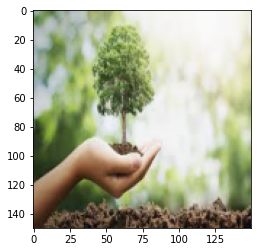

time: 3min 4s (started: 2021-06-28 15:33:06 +00:00)


In [159]:
flat_data = []
url = input('Enter the url of the image to be predicted : ')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

# **IN STREAMLIT**

In [160]:
!pip install streamlit --quiet

!pip install pyngrok --quiet
from pyngrok import ngrok

time: 5.67 s (started: 2021-06-28 15:36:11 +00:00)


In [35]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title('Image classification using MACHINE LEARNING')
st.test('Upload the image')

model = pickle.load(open('img_model.p','rb'))

uploader_file = st.file_uploader("choose an image....",type="jpg")

if uploader_file is not None:
  img = Image.open(uploader_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES = ['tree','book']
    st.write('Result :')
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f' PREDICTED OUTPUT: {y_out}')

Writing app.py
time: 3.95 ms (started: 2021-06-28 13:55:59 +00:00)


In [36]:
!nohup streamlit run app.py &
url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


<NgrokTunnel: "http://51bd1a6eb1ab.ngrok.io" -> "http://localhost:80">

time: 2.65 s (started: 2021-06-28 13:56:04 +00:00)
